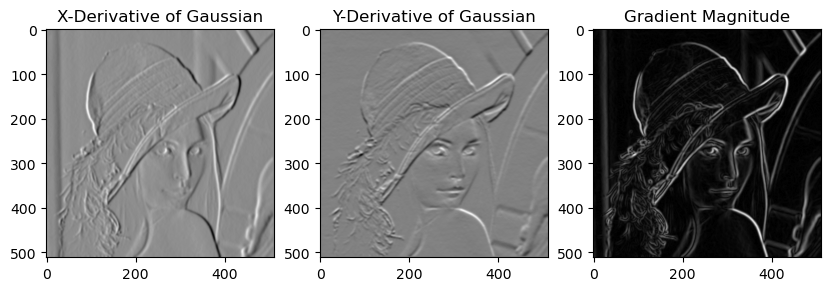

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_gaussian_derivatives(image, sigma=1):
    """
    Compute the x and y derivatives of a Gaussian and the gradient magnitude.

    Parameters:
    - image: Input image (grayscale).
    - sigma: Standard deviation for the Gaussian filter.

    Returns:
    - dx: The x-derivative of the Gaussian.
    - dy: The y-derivative of the Gaussian.
    - gradient_magnitude: The gradient magnitude of the Gaussian.
    """
    
    # Step 1: Apply Gaussian smoothing to reduce noise in the image
    # This creates a blurred version of the image using a Gaussian filter
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma, sigmaY=sigma)
    
    # Step 2: Compute the x-derivative using the Sobel operator
    # Sobel operator computes an approximation of the derivative in x direction
    dx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # 1 in x, 0 in y for x-derivative
    
    # Step 3: Compute the y-derivative using the Sobel operator
    # Sobel operator computes an approximation of the derivative in y direction
    dy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # 0 in x, 1 in y for y-derivative
    
    # Step 4: Compute the gradient magnitude
    # Gradient magnitude is calculated as sqrt(dx^2 + dy^2), using cv2.magnitude for efficiency
    gradient_magnitude = cv2.magnitude(dx, dy)
    
    # Return the derivatives and the gradient magnitude
    return dx, dy, gradient_magnitude


# Load the input image in grayscale
# The path 'your_image.jpg' should be replaced with the path to your desired image file


# Load images
#roses_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
lena_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the original images in grayscale
#roses_image = cv2.imread(roses_path, cv2.IMREAD_GRAYSCALE)
image = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

# Set the standard deviation for Gaussian blur (higher sigma = more smoothing)
sigma = 2

# Compute the Gaussian derivatives and gradient magnitude
dx, dy, gradient_magnitude = compute_gaussian_derivatives(image, sigma=sigma)

# Visualization: Display the x-derivative, y-derivative, and gradient magnitude
plt.figure(figsize=(10, 7))

# Display the x-derivative of the Gaussian
plt.subplot(1, 3, 1)
plt.title("X-Derivative of Gaussian")
plt.imshow(dx, cmap='gray')

# Display the y-derivative of the Gaussian
plt.subplot(1, 3, 2)
plt.title("Y-Derivative of Gaussian")
plt.imshow(dy, cmap='gray')

# Display the gradient magnitude (combined strength of both x and y derivatives)
plt.subplot(1, 3, 3)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude, cmap='gray')

# Show all plots
plt.show()
